In [68]:
#-----------------------------------------------------------------------
#                              Imports
# ----------------------------------------------------------------------

# Data Analysis
import pandas as pd
# Scientific computing
import numpy as np
# Creating static, animated, and interactive visualizations
import matplotlib.pylab as plt
# To do graphics and statical data visualization 
import seaborn as sns

# Used to list all the audios we'll use 
from glob import glob

# Imports to work with audio 
import librosa

# To display the audio that we want to analyze
import librosa.display
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn import svm,neighbors
from sklearn import metrics

from itertools import cycle


In [69]:
audios = glob("./datasets_tests/*.wav")
print('{} \n\n'.format(audios))

for i in range(len(audios)):
    print("Audios importados como y{}: {}" .format(i,audios[i]))

['./datasets_tests\\Carlos-record.wav', './datasets_tests\\Mix-record.wav', './datasets_tests\\record_sergio_1.wav'] 


Audios importados como y0: ./datasets_tests\Carlos-record.wav
Audios importados como y1: ./datasets_tests\Mix-record.wav
Audios importados como y2: ./datasets_tests\record_sergio_1.wav


In [70]:
y0, sr0 = librosa.load(audios[0], duration = 600)
y1, sr1 = librosa.load(audios[1], duration = 600)
y2, sr2 = librosa.load(audios[2], duration = 600)

print(y0.shape)
print(y1.shape)
print(y2.shape)


(13230000,)
(13230000,)
(13230000,)


In [71]:
print(sr0)
print(sr1)

22050
22050


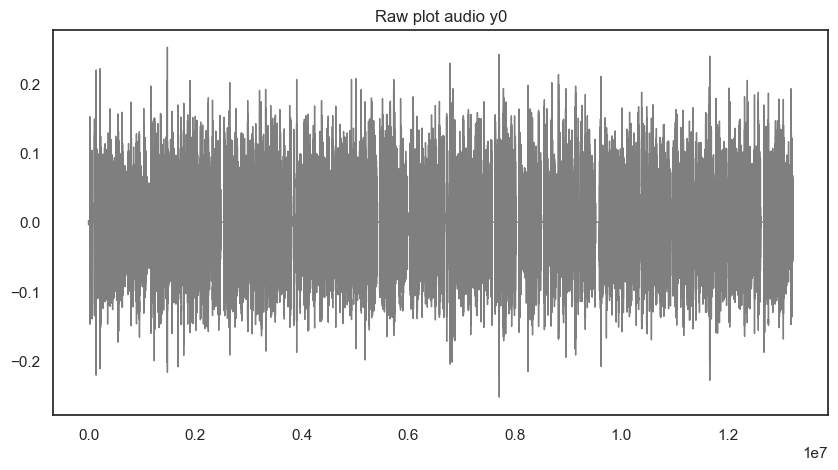

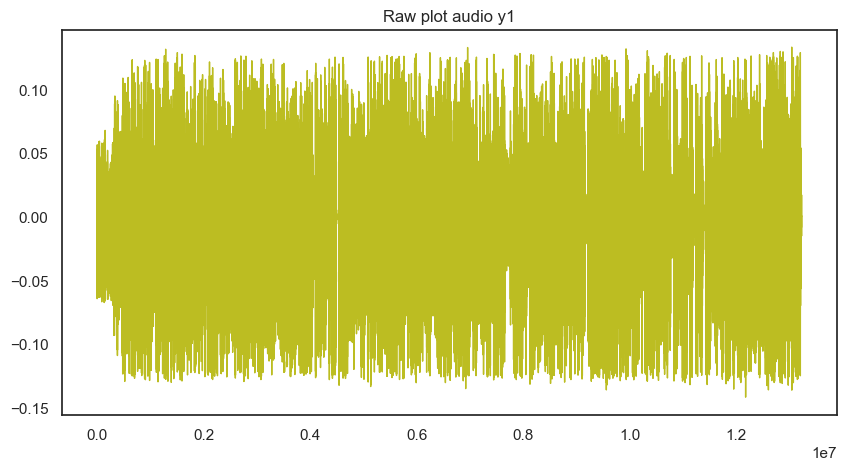

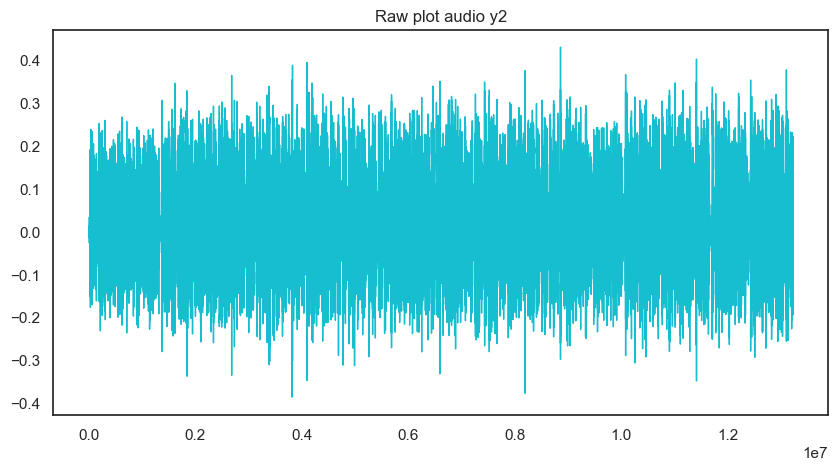

In [72]:
# Change visual theme of all plots
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

pd.Series(y0).plot(figsize=(10,5),title='Raw plot audio y0',lw=1,color=color_pal[7])
plt.show()
pd.Series(y1).plot(figsize=(10,5),title='Raw plot audio y1',lw=1,color=color_pal[8])
plt.show()
pd.Series(y2).plot(figsize=(10,5),title='Raw plot audio y2',lw=1,color=color_pal[9])
plt.show()

In [73]:
D = librosa.stft(y0)
print(D.shape)
S0_db = librosa.amplitude_to_db(np.absolute(D), ref = np.max)
S0_db.shape

(1025, 25840)


(1025, 25840)

In [74]:
D = librosa.stft(y1)
print(D.shape)
S1_db = librosa.amplitude_to_db(np.absolute(D), ref = np.max)
S1_db.shape

(1025, 25840)


(1025, 25840)

In [75]:
D = librosa.stft(y2)
S2_db = librosa.amplitude_to_db(np.absolute(D), ref = np.max)
S2_db.shape


(1025, 25840)

In [76]:
tags_0 = []
tags_1 = []
tags_2 = []

for i in range(len(S0_db)):
    tags_0.append(0)

for i in range(len(S1_db)):
    tags_1.append(1)

for i in range(len(S2_db)):
    tags_2.append(2)

print(len(tags_2))

1025


In [77]:

x0_train, x0_test, y0_train, y0_test = train_test_split(S0_db, tags_0, test_size = 0.2, random_state = 100)
x1_train, x1_test, y1_train, y1_test = train_test_split(S1_db, tags_1, test_size = 0.2, random_state = 100)
x2_train, x2_test, y2_train, y2_test = train_test_split(S2_db, tags_2, test_size = 0.2, random_state = 100)

print('train size: {}\t test size: {}'.format(len(x1_train), len(x1_test)))

train size: 820	 test size: 205


In [78]:
train_data = []
train_tags = []
test_data = []
test_tags = []

for i in x0_train:
    train_data.append(i.copy())

for i in x1_train:
    train_data.append(i.copy())

for i in x2_train:
    train_data.append(i.copy())

for i in y0_train:
    train_tags.append(i)

for i in y1_train:
    train_tags.append(i)

for i in y2_train:
    train_tags.append(i)

for i in x0_test:
    test_data.append(i.copy())

for i in x1_test:
    test_data.append(i.copy())

for i in x2_test:
    test_data.append(i.copy())

for i in y0_test:
    test_tags.append(i)

for i in y1_test:
    test_tags.append(i)

for i in y2_test:
    test_tags.append(i)

print('{} = {}??'.format(len(train_data), 820*3))

2460 = 2460??


In [79]:
knn = neighbors.KNeighborsClassifier()

knn.fit(train_data, train_tags)

KNeighborsClassifier()

In [80]:
prediction = knn.predict(test_data)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [1]:
accuracy = metrics.accuracy_score(y_true = test_tags, y_pred = prediction)
print(accuracy)

NameError: name 'metrics' is not defined

In [82]:
for kernel in ("linear", "rbf", "poly"):
    svc = svm.SVC(kernel = kernel, gamma = 10)
    svc.fit(train_data, train_tags)

    print('using kernel:', kernel)

    print("prediction: ".format(svc.decision_function(test_data)))

    print("Score: ".format(svc.score(test_data,test_tags)))

using kernel: linear
prediction: 
Score: 
using kernel: rbf
prediction: 
Score: 
